In [1]:
# !pip install fbprophet

In [2]:
from fbprophet import Prophet
from matplotlib import pyplot as plt
import pandas as pd

## 데이터 로드

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/data/화니의주방_stat.csv'
df = pd.read_csv(path, header=0)
print(df.shape)
print(df.head())

(405, 6)
   searchDate  dailyViewCount  ...  favorablePercent  activePercent
0  2020-01-09            6071  ...                97             29
1  2020-01-10            6294  ...                97             30
2  2020-01-11            6013  ...                97             29
3  2020-01-12            6846  ...                97             31
4  2020-01-13            7735  ...                97             33

[5 rows x 6 columns]


## 불필요한 컬럼 삭제(단변량 예측)

In [4]:
del df['dailyViewCount']
del df['videoCount']
del df['favorablePercent']
del df['activePercent']

In [5]:
# 데이터의 마지막 날짜와 그 다음 날짜를 저장
lastday = df['searchDate'][len(df)-1]
nextday = str(pd.date_range(lastday, periods=2)[1])[:10]
print("마지막 날짜 : {}, 예측 시작 날짜 : {}".format(lastday, nextday))

마지막 날짜 : 2021-02-16, 예측 시작 날짜 : 2021-02-17


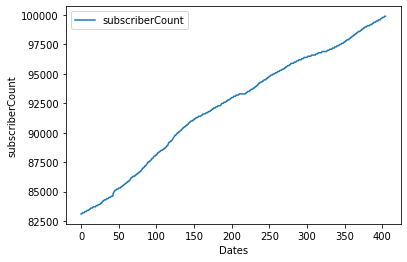

In [6]:
df.plot()
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.show()

## 모델에 맞게 데이터 전처리

In [7]:
# 컬럼명 변경
df.columns = ['ds', 'y']
# 데이터 타입 변경
df['ds']= pd.to_datetime(df['ds'])

# 모델 생성
model = Prophet()
# 모델 학습
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## 예측할 일 수 입력

In [8]:
# 예측할 날짜 일 수
predict_day = 9
# 예측 날짜 문자열 리스트 생성
pred_date = list()
for i in range(predict_day):
    pred_date.append(str(pd.date_range(nextday, periods=predict_day)[i])[:10])

# 날짜 리스트를 데이터 프레임 화
pred_date = pd.DataFrame(pred_date, columns = ['ds'])
# 문자열을 날짜 데이터 형식으로 변환
pred_date['ds']= pd.to_datetime(pred_date['ds'])

## 시각화

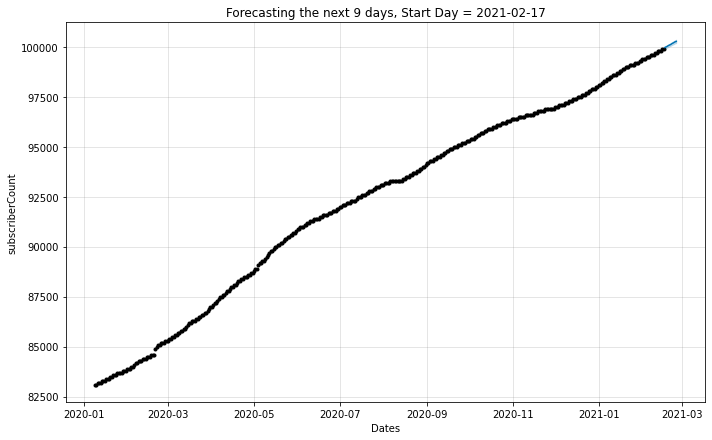

In [9]:
# 미래 예측
forecast = model.predict(pred_date)
model.plot(forecast)
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {predict_day} days, Start Day = {nextday}")
plt.show()

In [10]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-17,99967.618913,99908.945485,100035.847246,99967.618913,99967.618913,5.582503,5.582503,5.582503,5.582503,5.582503,5.582503,0.0,0.0,0.0,99973.201417
1,2021-02-18,100006.626458,99940.328468,100068.838243,100006.626458,100006.626458,-4.232393,-4.232393,-4.232393,-4.232393,-4.232393,-4.232393,0.0,0.0,0.0,100002.394064
2,2021-02-19,100045.634002,99976.706842,100109.113848,100045.634002,100045.634002,0.889016,0.889016,0.889016,0.889016,0.889016,0.889016,0.0,0.0,0.0,100046.523018
3,2021-02-20,100084.641546,100020.931537,100151.102882,100084.076007,100087.864771,1.954641,1.954641,1.954641,1.954641,1.954641,1.954641,0.0,0.0,0.0,100086.596187
4,2021-02-21,100123.649090,100051.007335,100189.319048,100118.191848,100133.325275,-6.930486,-6.930486,-6.930486,-6.930486,-6.930486,-6.930486,0.0,0.0,0.0,100116.718604
5,2021-02-22,100162.656635,100097.103818,100242.811521,100149.764609,100180.511375,3.199834,3.199834,3.199834,3.199834,3.199834,3.199834,0.0,0.0,0.0,100165.856469
6,2021-02-23,100201.664179,100126.850007,100278.996912,100181.318177,100228.569691,-0.463115,-0.463115,-0.463115,-0.463115,-0.463115,-0.463115,0.0,0.0,0.0,100201.201064
7,2021-02-24,100240.671723,100170.660474,100327.568049,100210.634992,100280.032571,5.582503,5.582503,5.582503,5.582503,5.582503,5.582503,0.0,0.0,0.0,100246.254226
8,2021-02-25,100279.679267,100191.162977,100363.510859,100236.455356,100330.291260,-4.232393,-4.232393,-4.232393,-4.232393,-4.232393,-4.232393,0.0,0.0,0.0,100275.446874


In [11]:
# yhat은 미래 예측 값, yhat_lower은 예측 하한값, yhat_upper은 예측 상한값
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

          ds           yhat     yhat_lower     yhat_upper
0 2021-02-17   99973.201417   99908.945485  100035.847246
1 2021-02-18  100002.394064   99940.328468  100068.838243
2 2021-02-19  100046.523018   99976.706842  100109.113848
3 2021-02-20  100086.596187  100020.931537  100151.102882
4 2021-02-21  100116.718604  100051.007335  100189.319048
5 2021-02-22  100165.856469  100097.103818  100242.811521
6 2021-02-23  100201.201064  100126.850007  100278.996912
7 2021-02-24  100246.254226  100170.660474  100327.568049
8 2021-02-25  100275.446874  100191.162977  100363.510859
